In [1]:
# Uncomment this code if you are running it on kaggle

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/target-marketing-for-canadian-bank-fall2023/train.csv
/kaggle/input/target-marketing-for-canadian-bank-fall2023/test.csv


## Machine Learning Using SKlearn and TensorFlow


In this Project following algorithms are implemented :

- **Logistic Regression**
- **Random Forest Classifier**
- **ADA Boost Classifier**
- **XGBoost Classifier (eXtreme Gradient Boosting)**

Along with GridSearchCV, RandomizedSearchCV and Bayesian Optimization techniques.

- **Neural Networks with Dropouts, Regularization and Early Stopping**





## Importing Required Libraries

In [2]:
!pip install bayesian-optimization==1.4.0

# import all the library
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization

from scipy.stats import uniform

# Tensorflow and Keras for Neural Networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax, Dropout
from tensorflow.keras import optimizers

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

print(tf.__version__)

# To plot pretty figures
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

  Attempting uninstall: bayesian-optimization
    Found existing installation: bayesian-optimization 1.4.3
    Uninstalling bayesian-optimization-1.4.3:
      Successfully uninstalled bayesian-optimization-1.4.3
2.13.0


In [3]:
# Uncomment this code to run it on kaggle
df = pd.read_csv('/kaggle/input/target-marketing-for-canadian-bank-fall2023/train.csv')
test_df = pd.read_csv('/kaggle/input/target-marketing-for-canadian-bank-fall2023/test.csv')

In [4]:
# For Colab
# Reading the train and test data file and storing it in a dataframe called 'df'
# df = pd.read_csv('./train.csv')
# test_df = pd.read_csv('./test.csv')

In [5]:
# Displaying the first 10 rows of the dataset
df.head(10)

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,...,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,...,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,...,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,...,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
5,CTSP000006,1,10013.83,0,0,0,0,0,0,0,...,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
6,CTSP000007,1,24092.37,0,0,0,0,0,0,0,...,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
7,CTSP000008,1,10777.00,0,1,0,0,0,0,0,...,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375
8,CTSP000009,1,28528.26,0,0,0,0,0,0,0,...,1,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375
9,CTSP000010,1,37049.83,0,0,0,0,0,0,0,...,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375


In [6]:
# Retrieving the dimensions of the dataframe
df.shape

(63999, 37)

In [7]:
# Displaying information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_id                  63999 non-null  object 
 1   Target                       63999 non-null  int64  
 2   Balance                      63999 non-null  float64
 3   PreviousCampaignResult       63999 non-null  int64  
 4   Product1                     63999 non-null  int64  
 5   Product2                     63999 non-null  int64  
 6   Product3                     63999 non-null  int64  
 7   Product4                     63999 non-null  int64  
 8   Product5                     63999 non-null  int64  
 9   Product6                     63999 non-null  int64  
 10  Transaction1                 63999 non-null  float64
 11  Transaction2                 63999 non-null  float64
 12  Transaction3                 63999 non-null  float64
 13  Transaction4    

In [8]:
# Checking for missing values
df.isnull().sum()

Customer_id                    0
Target                         0
Balance                        0
PreviousCampaignResult         0
Product1                       0
Product2                       0
Product3                       0
Product4                       0
Product5                       0
Product6                       0
Transaction1                   0
Transaction2                   0
Transaction3                   0
Transaction4                   0
Transaction5                   0
Transaction6                   0
Transaction7                   0
Transaction8                   0
Transaction9                   0
ExternalAccount1               0
ExternalAccount2               0
ExternalAccount3               0
ExternalAccount4               0
ExternalAccount5               0
ExternalAccount6               0
ExternalAccount7               0
ActivityIndicator              0
RegularInteractionIndicator    0
CompetitiveRate1               0
CompetitiveRate2               0
Competitiv

In [9]:
# Checking if there are any missing values in the 'df' dataframe
df.isnull().sum().any()

False

In [10]:
# Generating descriptive statistics for the dataframe and transposing the result for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,63999.0,0.499773,0.500004,0.000,0.000,0.000,1.000,1.000
Balance,63999.0,22697.014218,10819.489043,10000.000,13499.005,19982.570,30104.035,50000.000
PreviousCampaignResult,63999.0,0.001484,0.039303,0.000,0.000,0.000,0.000,2.000
Product1,63999.0,0.200441,0.400333,0.000,0.000,0.000,0.000,1.000
Product2,63999.0,0.160456,0.367031,0.000,0.000,0.000,0.000,1.000
Product3,63999.0,0.001766,0.041983,0.000,0.000,0.000,0.000,1.000
Product4,63999.0,0.092158,0.289251,0.000,0.000,0.000,0.000,1.000
Product5,63999.0,0.022125,0.147092,0.000,0.000,0.000,0.000,1.000
Product6,63999.0,0.041876,0.200307,0.000,0.000,0.000,0.000,1.000
Transaction1,63999.0,312.852441,4932.061568,0.000,0.000,0.000,0.000,505000.000


In [11]:
# Obtaining unique values for each column in the 'df' dataframe
df.apply(pd.unique)

Customer_id                    [CTSP000001, CTSP000002, CTSP000003, CTSP00000...
Target                                                                    [0, 1]
Balance                        [43824.59, 11256.21, 18795.11, 22274.72, 47923...
PreviousCampaignResult                                                 [0, 1, 2]
Product1                                                                  [0, 1]
Product2                                                                  [0, 1]
Product3                                                                  [0, 1]
Product4                                                                  [0, 1]
Product5                                                                  [0, 1]
Product6                                                                  [0, 1]
Transaction1                   [0.0, 13422.35, 13915.06, 5521.36, 460.0, 4015...
Transaction2                   [0.0, 800.0, 2360.0, 632.0, 124.0, 1755.7, 620...
Transaction3                

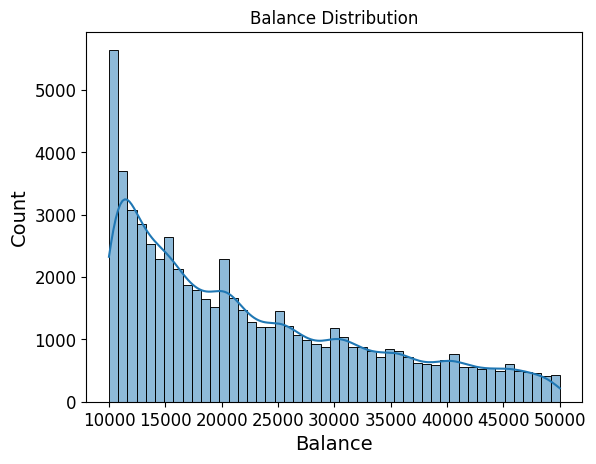

In [12]:
# Creating a histogram plot for the 'Balance' column in the 'df' dataframe with a kernel density estimate (KDE)
sns.histplot(df['Balance'], kde=True)

# Adding title and labels to the plot
plt.title('Balance Distribution')
plt.xlabel('Balance')

# Displaying the plot
plt.show()

In [13]:
# Percentage of target labels
df['Target'].value_counts(normalize=True)

Target
0    0.500227
1    0.499773
Name: proportion, dtype: float64

In [14]:
# Total count of target values in the dataset - Checking if there is any class imbalance
df['Target'].value_counts()

Target
0    32014
1    31985
Name: count, dtype: int64

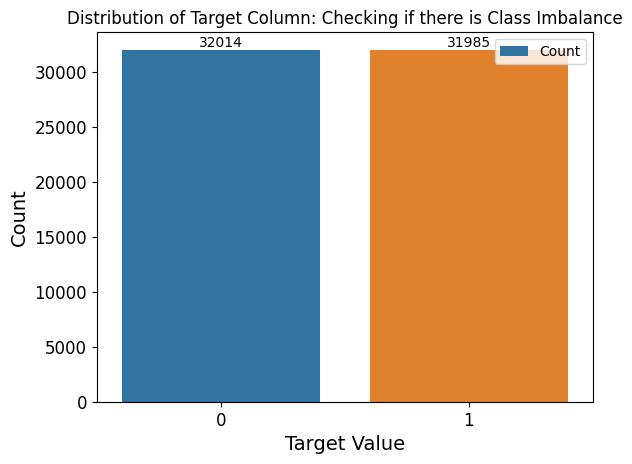

In [15]:
# Counting the occurrences of each unique value in the target column
target_counts = df['Target'].value_counts()

# Creating a bar chart to visualize the label distribution
sns.barplot(x=target_counts.index, y=target_counts.values, label='Count')

# Adding title and labels to the plot
plt.title('Distribution of Target Column: Checking if there is Class Imbalance')
plt.xlabel('Target Value')
plt.ylabel('Count')

# Displaying the count on top of each bar
for i, count in enumerate(target_counts.values):
    plt.text(i, count + 20, str(count), ha='center', va='bottom')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

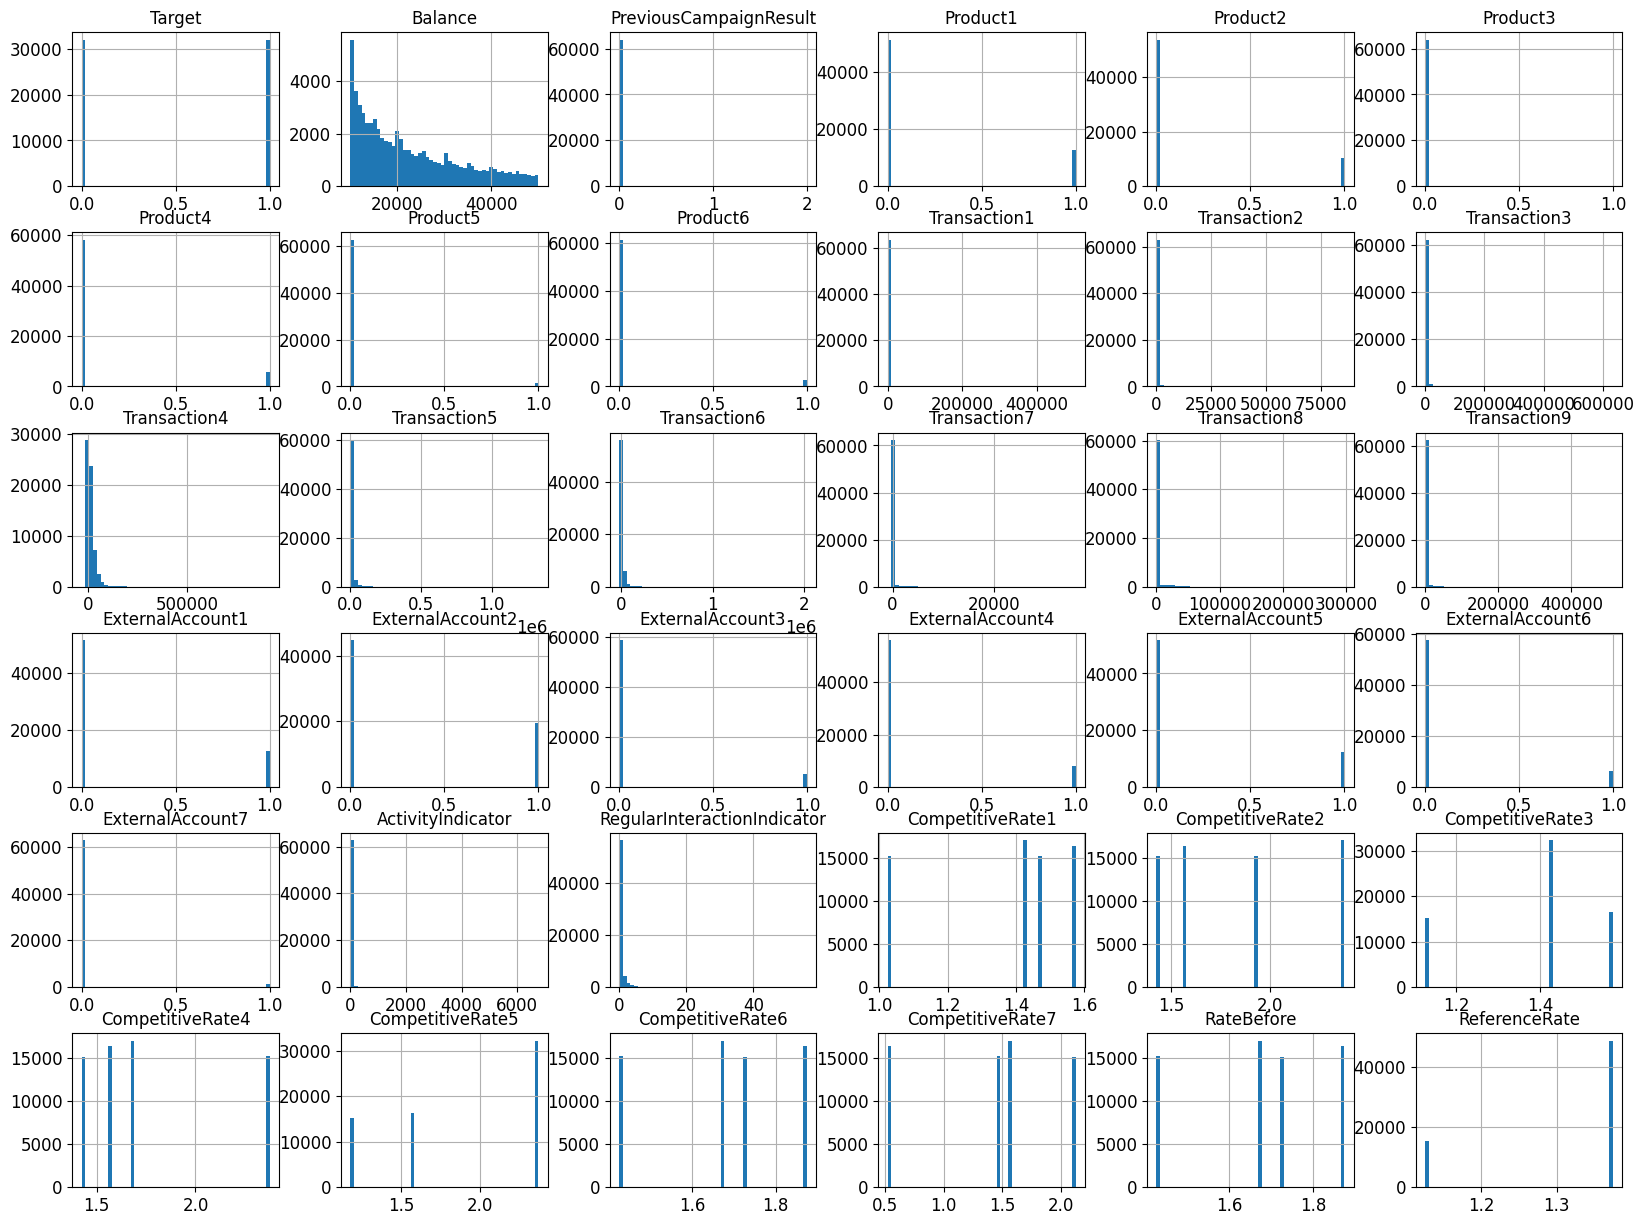

In [16]:
# Creating histograms for all columns in the DataFrame
df.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
# # Creating a correlation matrix
# def correlation_analysis():
#   plt.figure(figsize = (32, 16))
#   correlation_matrix  = df.corr(numeric_only=True)
#   sns.heatmap(correlation_matrix, annot=True)
#   # sns.heatmap(correlation_matrix, annot=False)

# correlation_analysis()

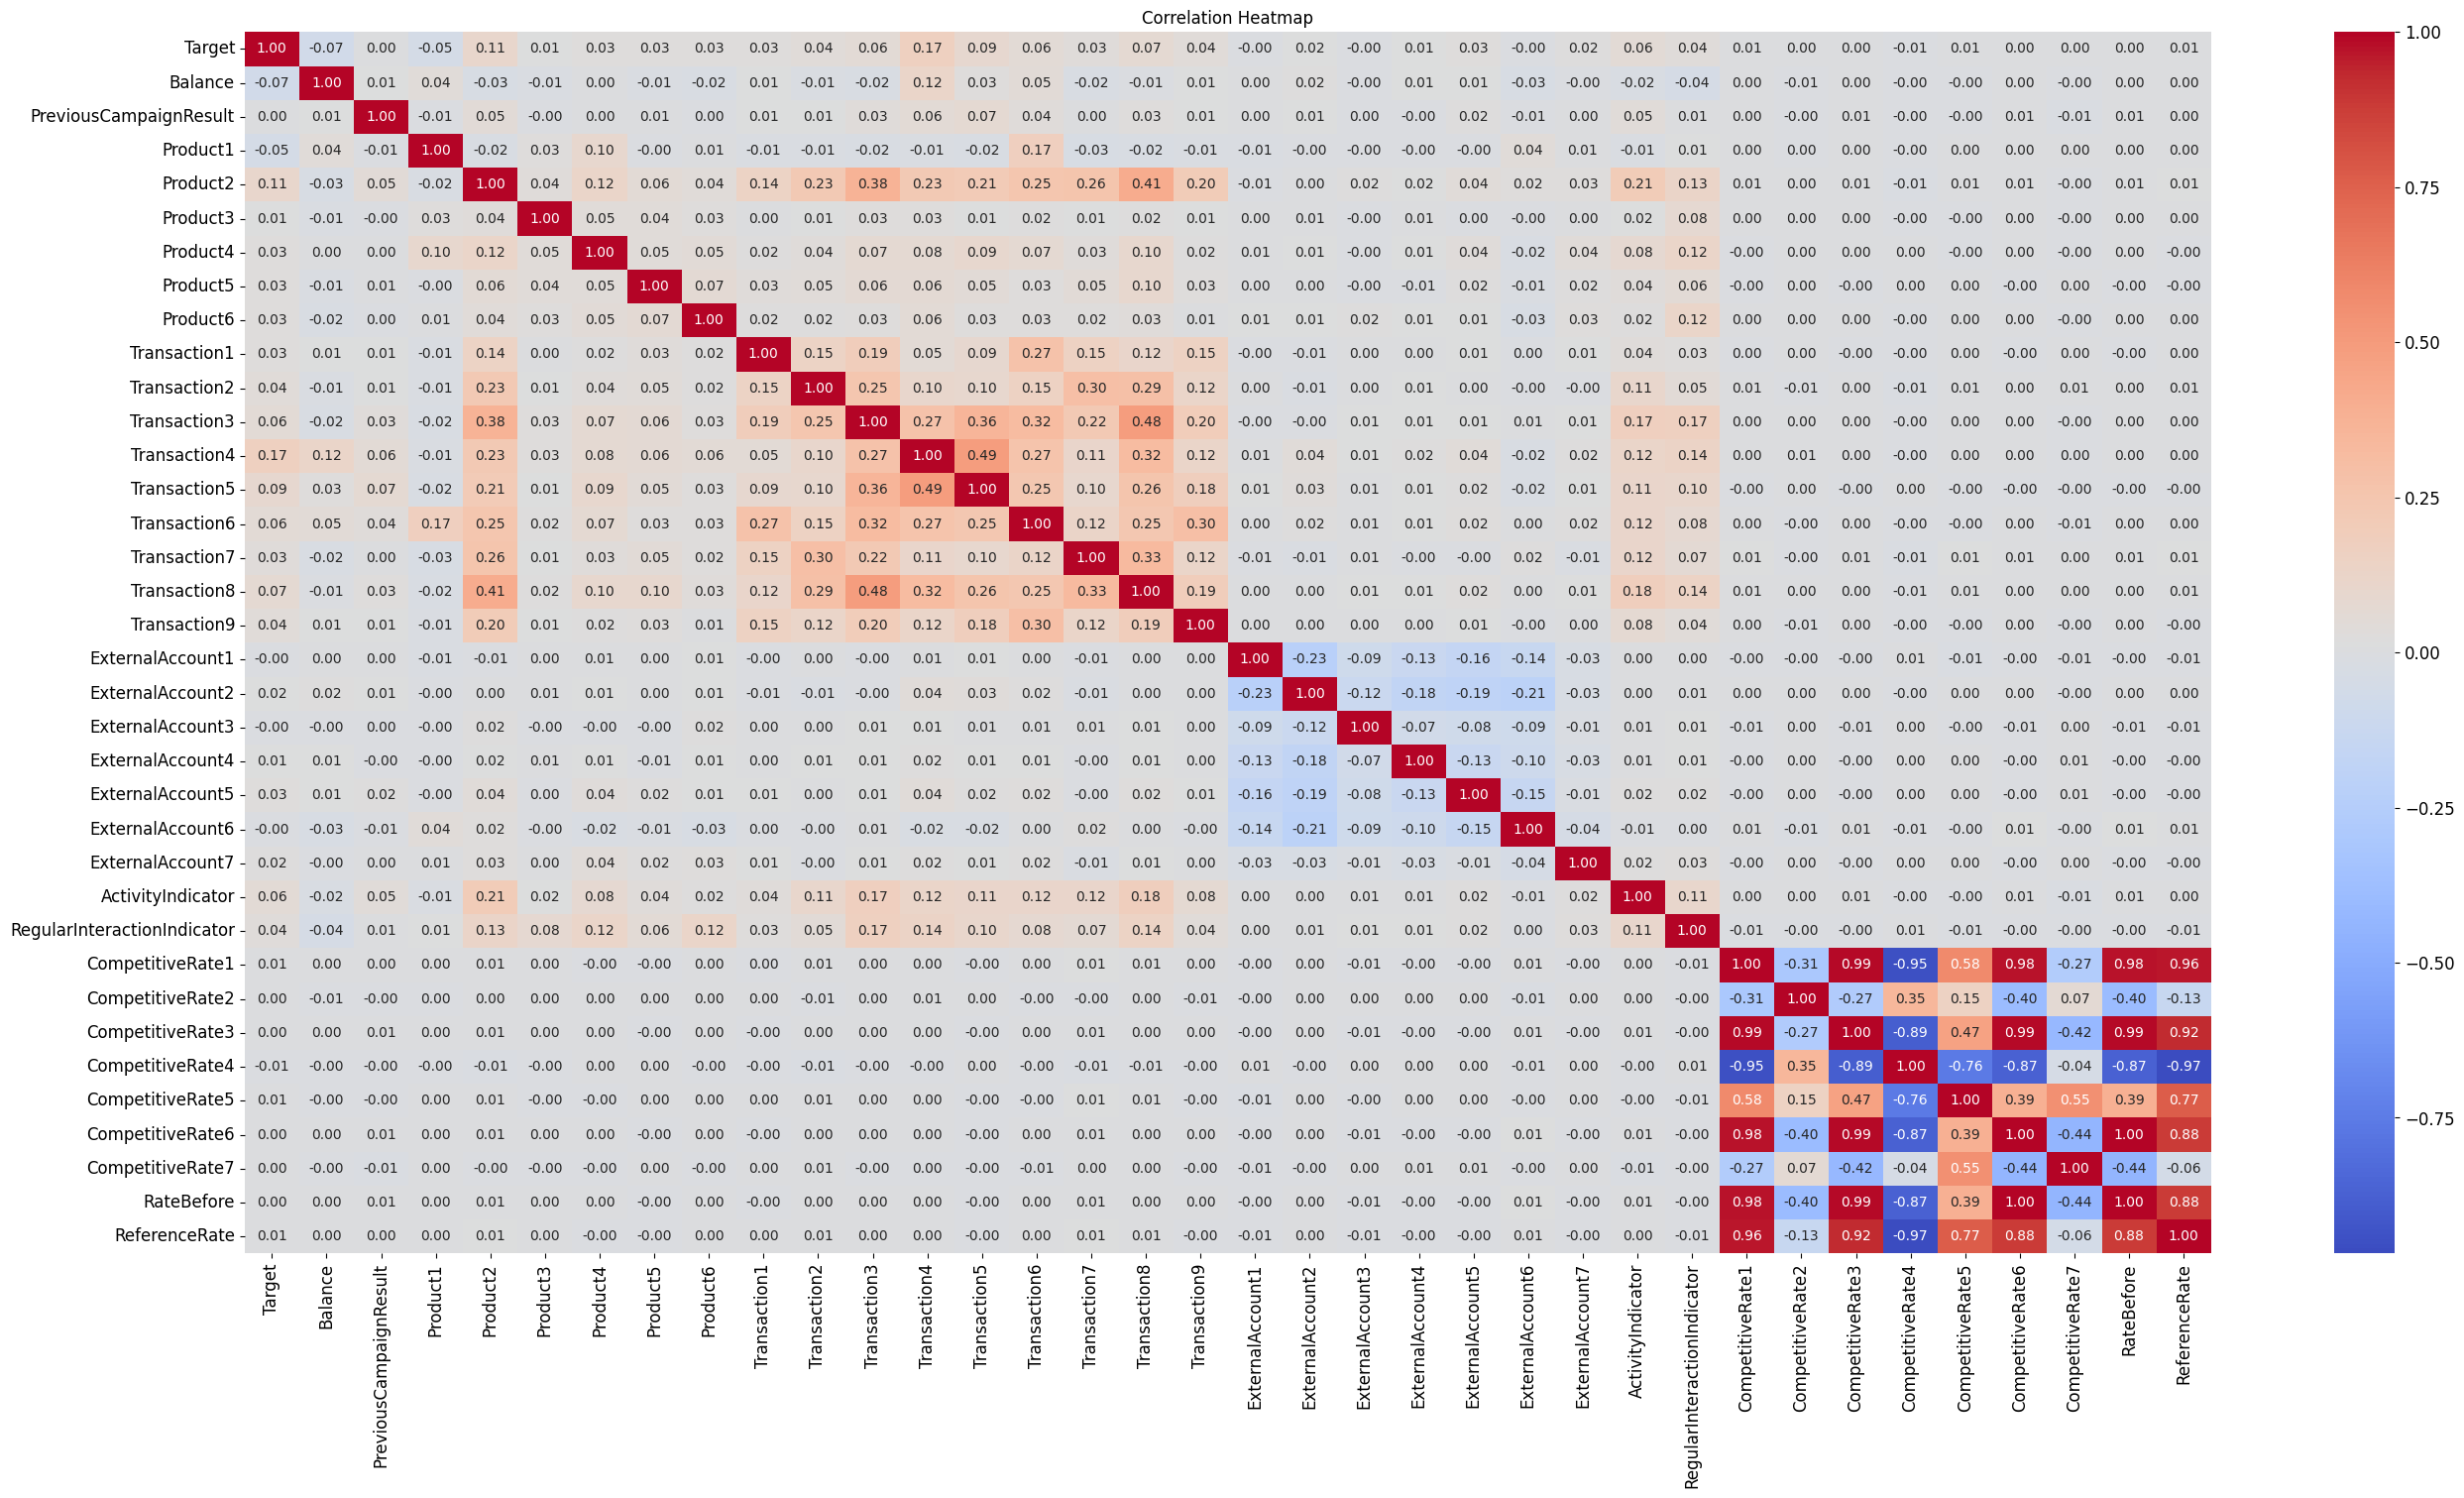

In [18]:
# Correlation Matrix (Tabular representation)
correlation_matrix = df.loc[:, df.columns != 'Customer_id'].corr()

# Heatmap of correlations
plt.figure(figsize=(32,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Multicollinearity refers to a statistical phenomenon in which two or more predictor variables in a regression model are highly correlated, making it difficult for the model to estimate the individual effects of each predictor on the dependent variable accurately.

A group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Depending on the features and the model, correlated features might not always harm the performance of the model but that is a real risk.

Remove Highly Correlated Features:

In [19]:
# # Setting the correlation threshold
# threshold = 0.7

# # Calculating the correlation matrix for the DataFrame 'df'
# corr_matrix = df.corr().abs()

# # Creating a mask to identify highly correlated features based on the threshold
# mask = (corr_matrix >= threshold) & (corr_matrix < 1.0)

# # Creating a list to store columns that are being considered for dropping due to high correlation
# columns_to_drop = []

# # Identifying and storing pairs of highly correlated features that are being considered for dropping
# for column in mask.columns:
#     correlated_features = list(mask.loc[mask[column]].index)
#     for feat in correlated_features:
#         if feat != column and feat not in columns_to_drop and column not in columns_to_drop:
#             columns_to_drop.append(feat)

# # Displaying the identified highly correlated features that are being considered for dropping
# print("Highly correlated features being considered for dropping:", columns_to_drop)

In [20]:
# Set the correlation threshold
threshold = 0.7

# Calculate the correlation matrix
corr_matrix = df.loc[:, df.columns != 'Customer_id'].corr().abs()

# Create a mask to identify highly correlated features
mask = (corr_matrix >= threshold) & (corr_matrix < 1.0)

# Create a list to store columns to drop
columns_to_drop = []

# Iterate through the columns and identify correlated features to drop
for column in mask.columns:
    correlated_features = list(mask.loc[mask[column]].index)
    for feat in correlated_features:
        if feat != column and feat not in columns_to_drop and column not in columns_to_drop:
            columns_to_drop.append(feat)

# Drop the identified highly correlated features
print(columns_to_drop)

['CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate6', 'RateBefore', 'ReferenceRate']


In [21]:
def categorize_columns(dataFrame, target, verbose = 0):
  # Columns to ignore during categorization
  ignore_columns = [target, 'Customer_id','CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate6', 'RateBefore', 'ReferenceRate']
  # Extracting predictor columns
  predictors_columns = [col for col in dataFrame.columns if col not in ignore_columns]
  # List of predefined categorical columns
  categorical_columns_list = ['PreviousCampaignResult', 'Product1', 'Product2', 'Product3',
                              'Product4', 'Product5', 'Product6', 'ExternalAccount1',
                              'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4',
                              'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7',
                              'CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate3',
                              'CompetitiveRate4', 'CompetitiveRate5', 'CompetitiveRate6',
                              'CompetitiveRate7', 'RateBefore', 'ReferenceRate'
                              ]
  # Filtering categorical columns
  categorical_columns=[col for col in categorical_columns_list if col not in ignore_columns]
  # Filtering numerical columns
  numerical_columns = [col for col in predictors_columns if col not in categorical_columns]
  print(f"Target column: {target}") if verbose else None
  print(f"Predictors Columns: {predictors_columns}") if verbose else None
  print(f"Categorical Columns: {categorical_columns}") if verbose else None
  print(f"Numerical Columns: {numerical_columns}") if verbose else None

  return [predictors_columns, categorical_columns, numerical_columns]

In [22]:
TARGET='Target'
# Categorizing columns and extracting predictors, categorical, and numerical columns
predictors_columns, categorical_columns, numerical_columns = categorize_columns(df, TARGET, verbose=1)

# Separating features (X) and target variable (y)
X = df[predictors_columns]
y = df[TARGET]

# Splitting the dataset into training and testing sets with stratified sampling based on the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2048, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

Target column: Target
Predictors Columns: ['Balance', 'PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8', 'Transaction9', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator', 'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate5', 'CompetitiveRate7']
Categorical Columns: ['PreviousCampaignResult', 'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6', 'ExternalAccount1', 'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5', 'ExternalAccount6', 'ExternalAccount7', 'CompetitiveRate1', 'CompetitiveRate2', 'CompetitiveRate5', 'CompetitiveRate7']
Numerical Columns: ['Balance', 'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4

In [23]:
def transform_variables(categorical_col, numerical_col):
  # Converting the non-transformed DataFrame columns into lists
  columns_categorical_list = list(categorical_col)
  columns_numerical_list = list(numerical_col)

  # Pipeline for categorical variables using OneHotEncoder
  pipeline_categorical = Pipeline([
    ('onehot', OneHotEncoder()),
  ])

  # Pipeline for numerical variables using StandardScaler
  pipeline_numerical = Pipeline([
    ('scaler', StandardScaler()),
  ])

  # ColumnTransformer combining both pipelines for categorical and numerical variables
  pipeline_full = ColumnTransformer([
    ("categorical", pipeline_categorical, columns_categorical_list),
    ("numerical", pipeline_numerical, columns_numerical_list),
  ])

  return pipeline_full

In [24]:
# Generate ROC curve
def generate_roc_curve(y_test, predictions):
  fpr, tpr, _ = roc_curve(y_test, predictions)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label='AUC ROC Curve')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

In [25]:
def calculate_roc_auc_score(y_test, y_score):
  # Calculating the ROC AUC score
  roc_auc = roc_auc_score(y_test, y_score)
  print(f"ROC AUC Score: {roc_auc}")

In [26]:
def calculate_precision_score(y_test, predictions):
  # Calculating the precision score
  precision = precision_score(y_test, predictions)
  print(f"Precision: {precision}")

In [27]:
def calculate_recall_score(y_test, predictions):
  # Calculating the recall score
  recall = recall_score(y_test, predictions)
  print(f"Recall: {recall}")

In [28]:
def calculate_classification_report(y_test, predictions):
  # Generating the classification report for the model
  print('----------------------Classification Report-----------------------')
  print(classification_report(y_test, predictions))

In [29]:
def calculate_scores(y_test, predictions, y_score):
  # Calculating and displaying ROC AUC score
  calculate_roc_auc_score(y_test, y_score)
  # Calculating and displaying precision score
  calculate_precision_score(y_test, predictions)
  # Calculating and displaying recall score
  calculate_recall_score(y_test, predictions)
  print('F1 Score:', f1_score(y_test, predictions))
  cm = confusion_matrix(y_test, predictions)
  print('Confusion Matrix:\n', cm)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()
  generate_roc_curve(y_test, y_score)

In [30]:
def get_feature_importance(coefficients):
  # Creating a dictionary with feature names and their corresponding coefficients
  feature_importance = dict(zip(predictors_columns, coefficients))

  # Sorting feature importance in descending order
  sorted_feature_importance= sorted(feature_importance.items(), key = lambda x: x[1], reverse=True)
  sorted_feature_importance

  # Displaying sorted feature importance
  for feature, importance in sorted_feature_importance:
      print(f"{feature}: {importance}")

In [31]:
# Creating and fitting a full data transformation pipeline
pipeline_full = transform_variables(categorical_columns, numerical_columns)

# Transforming the training and testing sets
pipeline_full.fit(X_train)
X_train = pipeline_full.transform(X_train)
X_test = pipeline_full.transform(X_test)
print(f"X_train transformed.shape: {X_train.shape}")
print(f"X_test transformed.shape: {X_test.shape}")

X_train transformed.shape: (51199, 56)
X_test transformed.shape: (12800, 56)


# Implementing Logistic Regression

In [32]:
# Initializing the logistic regression model
model = LogisticRegression(n_jobs=-1, random_state=42)

# Training the model using the training data
model.fit(X_train, y_train)

# Making predictions on the test data
predictions = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      6403
           1       0.64      0.54      0.59      6397

    accuracy                           0.62     12800
   macro avg       0.62      0.62      0.62     12800
weighted avg       0.62      0.62      0.62     12800

ROC AUC Score: 0.6508360560919069
Precision: 0.643496086470369
Recall: 0.5397842738783805
F1 Score: 0.5870951287936751
Confusion Matrix:
 [[4490 1913]
 [2944 3453]]


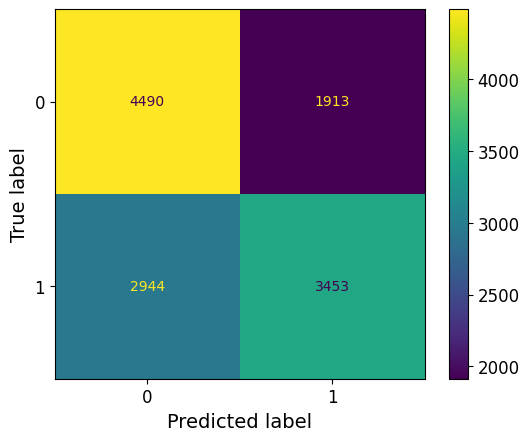

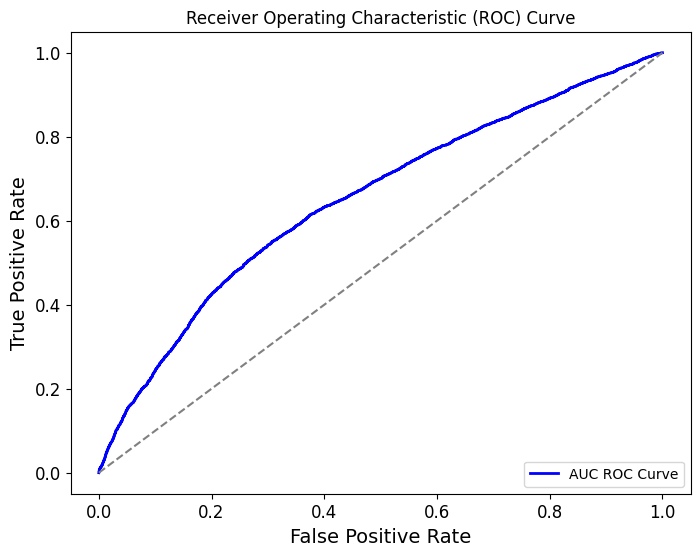

In [33]:
# Getting classification reports
calculate_classification_report(y_test, predictions)
calculate_scores(y_test, predictions, proba)

## GridSearchCV on Logistic Regression

In [34]:
# Initializing the logistic regression model
Logistic_Regression = LogisticRegression(random_state=42)

# Defining a range of values for the regularization parameter 'C'
C = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]


# Creating a parameter grid for GridSearchCV
param_grid = {'C' : C}

# Setting up GridSearchCV with logistic regression, parameter grid, and 10-fold cross-validation
grid_search_LogReg = GridSearchCV(Logistic_Regression, param_grid=param_grid, cv = 10, scoring='roc_auc',
                               refit = True, n_jobs=-1)

# Fitting the GridSearchCV instance to the training data
grid_search_LogReg.fit(X_train, y_train)

# Getting the best hyperparameters found by GridSearchCV
best_params = grid_search_LogReg.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model from GridSearchCV
best_model_LogReg = grid_search_LogReg.best_estimator_
print(best_model_LogReg)

# Evaluating the best model on the test set and displaying accuracy
best_model_score = best_model_LogReg.score(X_test, y_test)
print("Accuracy on Test Set (using best model):", best_model_score)

# Making predictions and calculating various classification scores and metrics
predictions = best_model_LogReg.predict(X_test)
proba = best_model_LogReg.predict_proba(X_test)[:, 1]

Best Hyperparameters: {'C': 0.01}
LogisticRegression(C=0.01, random_state=42)
Accuracy on Test Set (using best model): 0.62140625


ROC AUC Score: 0.6508754848115079
Precision: 0.6443865202010799
Recall: 0.5410348600906675
F1 Score: 0.5882053025152957
Confusion Matrix:
 [[4493 1910]
 [2936 3461]]


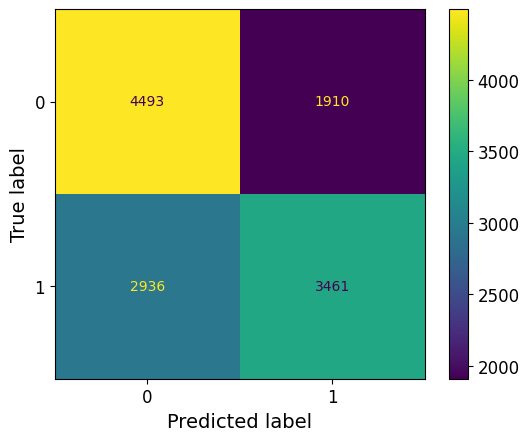

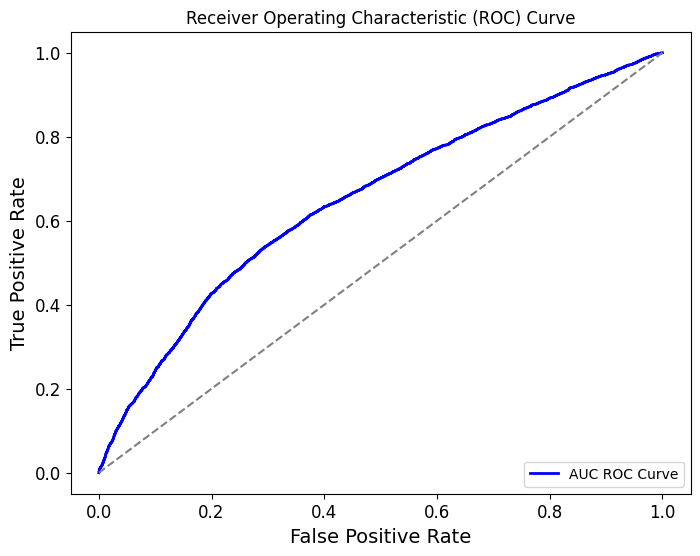

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      6403
           1       0.64      0.54      0.59      6397

    accuracy                           0.62     12800
   macro avg       0.62      0.62      0.62     12800
weighted avg       0.62      0.62      0.62     12800



In [35]:
# Getting the proper classification report
calculate_scores(y_test, predictions, proba)
calculate_classification_report(y_test, predictions)

## Randomized Search CV on Logistic Regression

In [36]:
# Definining hyperparameter search space for RandomizedSearchCV
param_distributions_LogReg = {
    'C': C,  # Regularization parameter
}

# Initializing RandomizedSearchCV
random_search_LogReg = RandomizedSearchCV(estimator=model, param_distributions=param_distributions_LogReg,
                                   scoring='roc_auc', cv=10, n_jobs=-1, random_state=42, refit=True)

# Fitting the RandomSearchCV instance to the data
random_search_LogReg.fit(X_train, y_train)

# Getting the best hyperparameters found by RandomSearchCV
best_params = random_search_LogReg.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model_LogReg = random_search_LogReg.best_estimator_
print(best_model_LogReg)

# Evaluating the best model on the test set
best_model_score = best_model_LogReg.score(X_test, y_test)
print("Accuracy on Test Set (using best model):", best_model_score)

predictions = best_model_LogReg.predict(X_test)
proba = best_model_LogReg.predict_proba(X_test)[:, 1]

Best Hyperparameters: {'C': 0.01}
LogisticRegression(C=0.01, n_jobs=-1, random_state=42)
Accuracy on Test Set (using best model): 0.62140625


----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      6403
           1       0.64      0.54      0.59      6397

    accuracy                           0.62     12800
   macro avg       0.62      0.62      0.62     12800
weighted avg       0.62      0.62      0.62     12800

ROC AUC Score: 0.6508755092255758
Precision: 0.6443865202010799
Recall: 0.5410348600906675
F1 Score: 0.5882053025152957
Confusion Matrix:
 [[4493 1910]
 [2936 3461]]


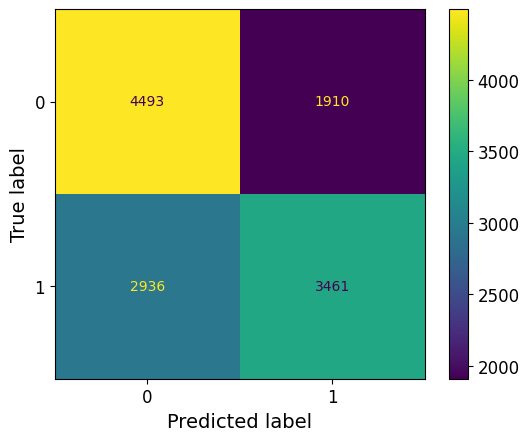

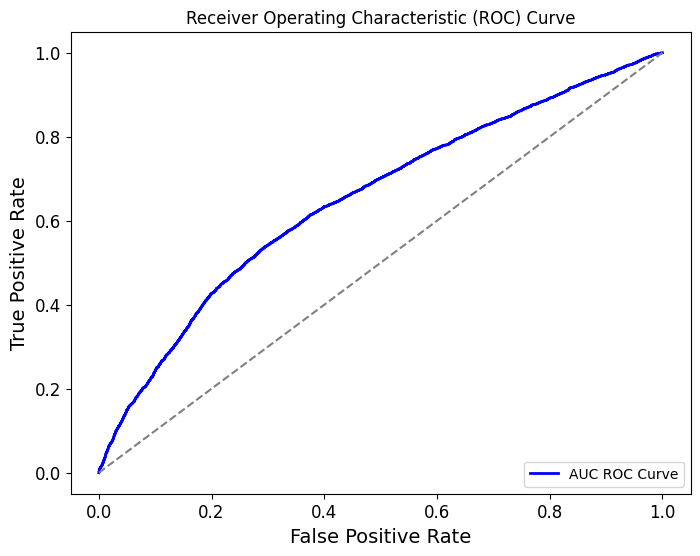

In [37]:
# Getting the proper classification report
calculate_classification_report(y_test, predictions)
calculate_scores(y_test, predictions, proba)

## Bayesian Optimization on Logistic Regression

In [38]:
# Defining the function for hyperparameter tuning
def optimize_logistic_regression(C):
  model = LogisticRegression(C=C, random_state=42)
  model.fit(X_train, y_train)
  proba = model.predict_proba(X_test)[:, 1]
  return roc_auc_score(y_test, proba)

In [39]:
# Defining the search space for hyperparameters
param_bounds = {
    'C': (0.0000001, 0.1)
}

# Initializing BayesianOptimization for precision tuning
bayes_optimizer = BayesianOptimization(
    f=optimize_logistic_regression,
    pbounds=param_bounds,
    random_state=42
)

# Performing Bayesian Optimization
bayes_optimizer.maximize(init_points=10, n_iter=20)

# Getting the best hyperparameters and maximum precision found
best_params = bayes_optimizer.max['params']
best_precision = bayes_optimizer.max['target']

print(f"Best Hyperparameters for Precision: {best_params}")
print(f"Best Precision: {best_precision}")
print(f"best combination of parameters and target value: {bayes_optimizer.max}")

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.6509    | 0.03745   |
| 2         | 0.6509    | 0.09507   |
| 3         | 0.6509    | 0.0732    |
| 4         | 0.6509    | 0.05987   |
| 5         | 0.6509    | 0.0156    |
| 6         | 0.6509    | 0.0156    |
| 7         | 0.6509    | 0.005808  |
| 8         | 0.6509    | 0.08662   |
| 9         | 0.6509    | 0.06011   |
| 10        | 0.6509    | 0.07081   |
| 11        | 0.6509    | 0.03747   |
| 12        | 0.6509    | 0.03743   |
| 13        | 0.6509    | 0.01555   |
| 14        | 0.6509    | 0.03739   |
| 15        | 0.6509    | 0.03736   |
| 16        | 0.6509    | 0.0373    |
| 17        | 0.6509    | 0.03726   |
| 18        | 0.6509    | 0.03721   |
| 19        | 0.6509    | 0.03716   |
| 20        | 0.6509    | 0.03709   |
| 21        | 0.6509    | 0.03711   |
| 22        | 0.6509    | 0.03705   |
| 23        | 0.6509    | 0.037     |
| 24        | 0.6509    | 0.03695   |
| 25        

## Testing on test set

ROC AUC Score: 0.6509202846260391
Precision: 0.6437081161578555
Recall: 0.5405658902610598
F1 Score: 0.5876455093890729
Confusion Matrix:
 [[4489 1914]
 [2939 3458]]


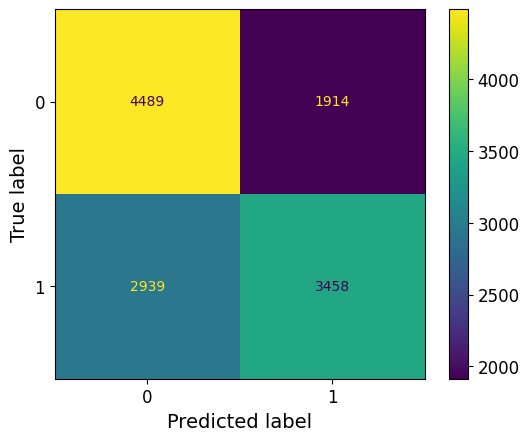

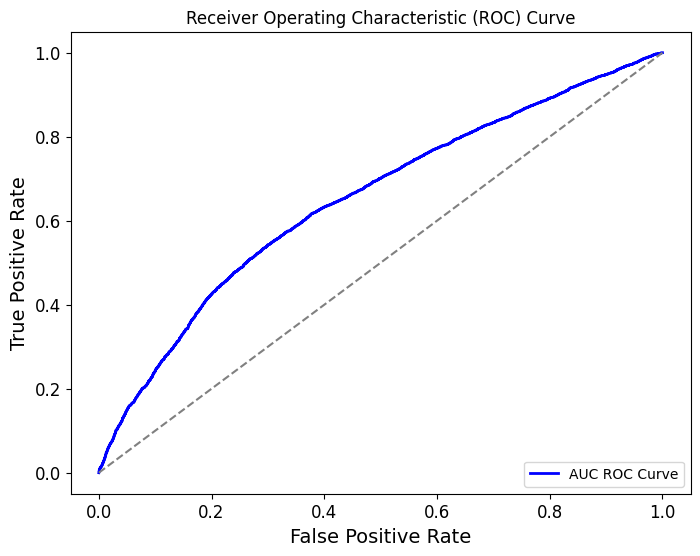

In [40]:
# Initializing the logistic regression model with the best hyperparameters
best_model_LogReg = LogisticRegression(C=0.03708535157057667, random_state=42, n_jobs=-1)
# Training the model on the training data
best_model_LogReg.fit(X_train, y_train)

# Making predictions on the test data
predictions = best_model_LogReg.predict(X_test)
proba = best_model_LogReg.predict_proba(X_test)[:, 1]
calculate_scores(y_test, predictions, proba)

In [41]:
# Generating the classification report
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      6403
           1       0.64      0.54      0.59      6397

    accuracy                           0.62     12800
   macro avg       0.62      0.62      0.62     12800
weighted avg       0.62      0.62      0.62     12800



In [42]:
# Getting feature importance of Logistic Regression
get_feature_importance(best_model_LogReg.coef_[0])

Balance: 0.2327071023270505
Product5: 0.14228384953900808
Product2: 0.12788321870582642
CompetitiveRate5: 0.1055273115044637
Transaction5: 0.08682313737867839
ActivityIndicator: 0.06586922896820156
ExternalAccount2: 0.051399944584680446
ExternalAccount6: 0.049286820275298134
Transaction7: 0.04635056968966136
CompetitiveRate1: 0.04019517435532065
Transaction9: 0.03940231829309948
Transaction1: 0.036482964961182994
Transaction3: 0.0240366593263352
ExternalAccount3: 0.020149183982315258
Product1: 0.0038457097770093003
CompetitiveRate7: 0.0007868013866029695
ExternalAccount4: -0.002856756021034974
Transaction2: -0.006744231365052019
Product6: -0.01919053699990112
Transaction8: -0.022109890331823184
RegularInteractionIndicator: -0.022902746394044066
Transaction6: -0.029058141728382073
ExternalAccount5: -0.03199439231402798
ExternalAccount1: -0.03410751662340283
ExternalAccount7: -0.04857680100692976
Transaction4: -0.0695307094174014
CompetitiveRate2: -0.08823488354318595
Product3: -0.110590

In [43]:
# Exporting the predictions to CSV File
def export_prediction_to_csv(model, filename):
  predictors_columns, categorical_columns, numerical_columns = categorize_columns(test_df, TARGET)
  X = test_df[predictors_columns]

  X_transformed = pipeline_full.transform(X)

  # Make predictions on the test data
  predictions = model.predict(X_transformed)

  test_predictions= pd.DataFrame(columns=['Customer_id', 'Target'])
  test_predictions['Customer_id'] = test_df['Customer_id']
  test_predictions['Target'] = predictions

  test_predictions.to_csv(f'/kaggle/working/{filename}.csv', index=False)

In [44]:
export_prediction_to_csv(best_model_LogReg, 'logistic_regression_predictions')

# Random Forest Classifier

With Grid Search CV and Randomized Search CV

## Random Forest Classifier with GridSearchCV

In [45]:
# Random Forest Classifier hyperparameter tuning
n_estimators = [10, 100, 250]
max_features = [0.1, 0.5,]
max_depth = [10, 20]
max_leaf_nodes = [10, 100, 200]

# Creating a parameter grid for Random Forest Classifier
parameter_random_forest = {
    'n_estimators': n_estimators, # The number of trees in the forest.
    'max_features' : max_features, # If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
    'max_depth' : max_depth, # The maximum depth of the tree.
    'max_leaf_nodes' : max_leaf_nodes, # Grow trees with max_leaf_nodes in best-first fashion.
  }

# Initializing Random Forest Classifier
Random_Forest_Classifier = RandomForestClassifier(random_state = 42, n_jobs=-1)

# Using grid search to tune the model
grid_search_RndmForest = GridSearchCV(Random_Forest_Classifier,parameter_random_forest, cv = 4, scoring='roc_auc', refit = True,
                                     n_jobs=-1)

# Fitting the grid search instance to the training data
%time grid_search_RndmForest.fit(X_train, y_train)

# Getting the best hyperparameters and the best model from GridSearchCV
forest_best_params_ = grid_search_RndmForest.best_params_
forest_best_estimators_ = grid_search_RndmForest.best_estimator_

print(forest_best_params_)
print(forest_best_estimators_)

CPU times: user 1min 15s, sys: 1.13 s, total: 1min 16s
Wall time: 10min 35s
{'max_depth': 10, 'max_features': 0.5, 'max_leaf_nodes': 200, 'n_estimators': 250}
RandomForestClassifier(max_depth=10, max_features=0.5, max_leaf_nodes=200,
                       n_estimators=250, n_jobs=-1, random_state=42)


Accuracy on Test Set (using best model): 0.630078125
ROC AUC Score: 0.6746932878964744
Precision: 0.6365877712031558
Recall: 0.6054400500234485
F1 Score: 0.620623347488182
Confusion Matrix:
 [[4192 2211]
 [2524 3873]]


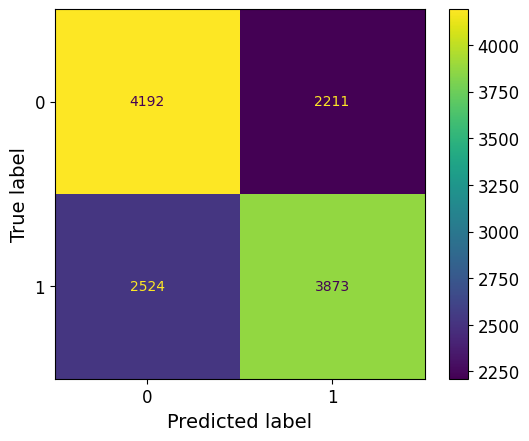

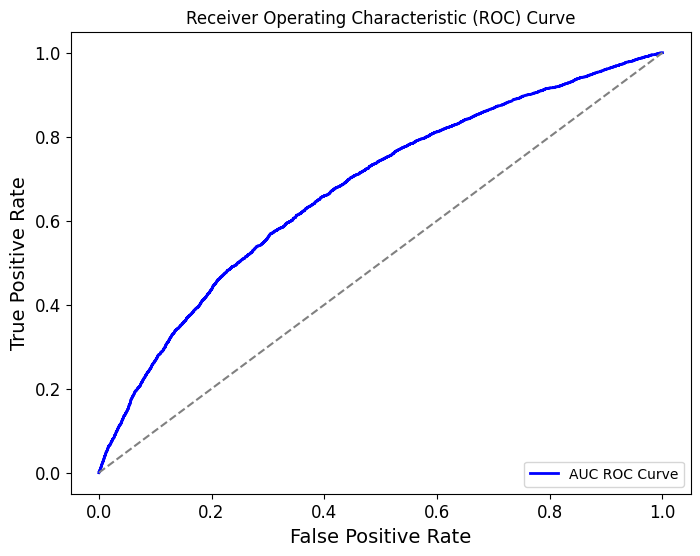

In [46]:
print("Accuracy on Test Set (using best model):", forest_best_estimators_.score(X_test, y_test))
# Making predictions on the test data using the best model
predictions = forest_best_estimators_.predict(X_test)
proba = forest_best_estimators_.predict_proba(X_test)[:, 1]
calculate_scores(y_test, predictions, proba)

In [47]:
# Generating classification report
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.62      0.65      0.64      6403
           1       0.64      0.61      0.62      6397

    accuracy                           0.63     12800
   macro avg       0.63      0.63      0.63     12800
weighted avg       0.63      0.63      0.63     12800



## Randomized Search CV on Random Forest Classifier

Best Hyperparameters: {'n_estimators': 200, 'max_leaf_nodes': 200, 'max_features': 0.5, 'max_depth': 20}
RandomForestClassifier(max_depth=20, max_features=0.5, max_leaf_nodes=200,
                       n_estimators=200, n_jobs=-1, random_state=42)
Accuracy on Test Set (using best model): 0.63078125
ROC AUC Score: 0.6749588397126357
Precision: 0.6363191385217817
Recall: 0.6096607784899172
F1 Score: 0.6227047740699346
Confusion Matrix:
 [[4174 2229]
 [2497 3900]]


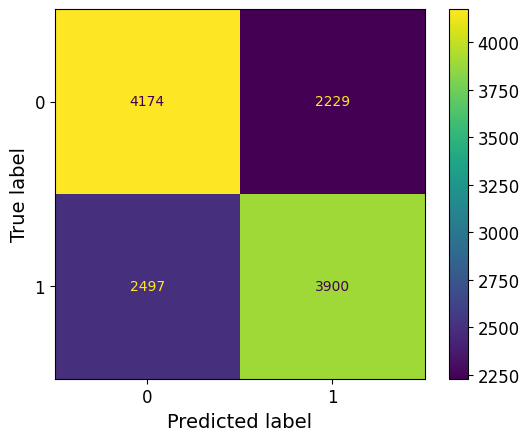

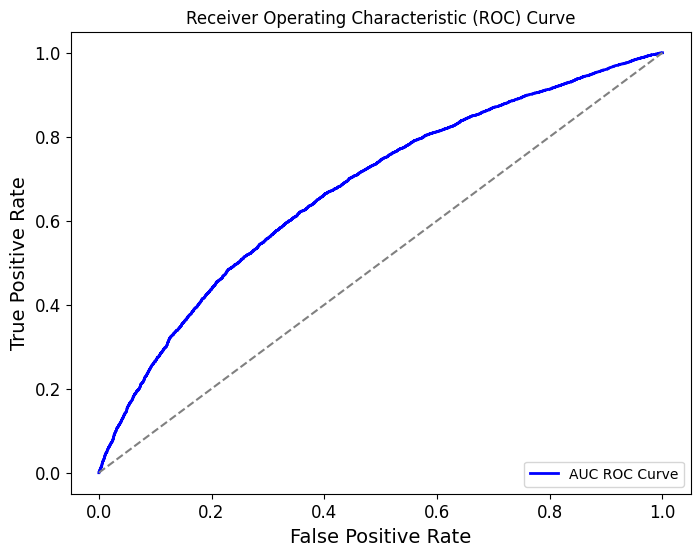

In [48]:
# Hyperparameter tuning using RandomizedSearchCV for Random Forest Classifier
n_estimators = [10, 200, 250]
max_features = [0.1, 0.5, 0.9]
max_depth = [2, 10, 20]
max_leaf_nodes = [10, 100, 200]

# Creating a parameter grid for Random Forest Classifier
parameter_random_forest = {
    'n_estimators': n_estimators, # The number of trees in the forest.
    'max_features' : max_features, # If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
    'max_depth' : max_depth, # The maximum depth of the tree.
    'max_leaf_nodes' : max_leaf_nodes # Grow trees with max_leaf_nodes in best-first fashion.
  }

# Initializing RandomizedSearchCV
rndm_grid_search_RndmForest = RandomizedSearchCV(estimator=Random_Forest_Classifier, param_distributions=parameter_random_forest,
                                   scoring='roc_auc', cv=4, n_jobs = -1, random_state=42, refit=True, n_iter=20)

# Fitting the RandomSearchCV instance to the training data
rndm_grid_search_RndmForest.fit(X_train, y_train)

# Getting the best hyperparameters found by RandomizedSearchCV
best_params = rndm_grid_search_RndmForest.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model from RandomizedSearchCV
best_model_rndm_grid_RndmForest = rndm_grid_search_RndmForest.best_estimator_
print(best_model_rndm_grid_RndmForest)


# Evaluating the best model on the test set and displaying accuracy
best_model_score = best_model_rndm_grid_RndmForest.score(X_test, y_test)
print("Accuracy on Test Set (using best model):", best_model_score)

predictions = best_model_rndm_grid_RndmForest.predict(X_test)
proba = best_model_rndm_grid_RndmForest.predict_proba(X_test)[:, 1]
calculate_scores(y_test, predictions, proba)

In [49]:
# Generating classification report
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6403
           1       0.64      0.61      0.62      6397

    accuracy                           0.63     12800
   macro avg       0.63      0.63      0.63     12800
weighted avg       0.63      0.63      0.63     12800



## Bayesian Optimization on Random Forest Classifier

In [50]:
# Define the function for hyperparameter tuning
def optimize_random_forest(n_estimators, max_features, max_depth, max_leaf_nodes,criterion_idx):
  # Mapping index to criterion values
  criterion_values=['gini', 'entropy', 'log_loss']

  # Converting parameters to appropriate types
  n_estimators=int(n_estimators)
  max_depth = int(max_depth)
  max_leaf_nodes = int(max_leaf_nodes)
  criterion_idx = round(criterion_idx)

  # Initializing the Random Forest Classifier with specified hyperparameters
  model = RandomForestClassifier(random_state = 42, n_estimators=n_estimators, max_features=max_features,
                                 max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, n_jobs=-1, criterion=criterion_values[criterion_idx])

  # Training the model on the training data
  model.fit(X_train, y_train)

  # Making predictions on the test data and calculating ROC AUC score
  proba = model.predict_proba(X_test)[:, 1]
  return roc_auc_score(y_test, proba)

In [51]:
# Defining the search space for hyperparameters
n_estimators = (10, 250)
max_features = (0.1, 0.9)
max_depth = (2, 20)
max_leaf_nodes = (2,200)
criterion_idx= (0,2)

parameter_random_forest = {'n_estimators' : n_estimators, 'max_features' : max_features,
                     'max_depth' : max_depth,
                     'max_leaf_nodes' : max_leaf_nodes,
                      'criterion_idx': criterion_idx
                           }

# Initializing BayesianOptimization for precision tuning
bayes_optimizer = BayesianOptimization(
    f=optimize_random_forest,
    pbounds=parameter_random_forest,
    random_state=42
)

# Performing Bayesian Optimization
bayes_optimizer.maximize(init_points=10, n_iter=30)

# Getting the best hyperparameters and maximum precision found
best_params = bayes_optimizer.max['params']
best_precision = bayes_optimizer.max['target']

print(f"Best Hyperparameters for Precision: {best_params}")
print(f"Best Precision: {best_precision}")
print(f"best combination of parameters and target value: {bayes_optimizer.max}")

|   iter    |  target   | criter... | max_depth | max_fe... | max_le... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.674     | 0.7491    | 19.11     | 0.6856    | 120.5     | 47.44     |
| 2         | 0.6612    | 0.312     | 3.046     | 0.7929    | 121.0     | 179.9     |
| 3         | 0.6728    | 0.04117   | 19.46     | 0.766     | 44.04     | 53.64     |
| 4         | 0.6739    | 0.3668    | 7.476     | 0.5198    | 87.53     | 79.89     |
| 5         | 0.6647    | 1.224     | 4.511     | 0.3337    | 74.54     | 119.5     |
| 6         | 0.6686    | 1.57      | 5.594     | 0.5114    | 119.3     | 21.15     |
| 7         | 0.6631    | 1.215     | 5.069     | 0.152     | 189.9     | 241.8     |
| 8         | 0.6678    | 1.617     | 7.483     | 0.1781    | 137.5     | 115.6     |
| 9         | 0.6682    | 0.2441    | 10.91     | 0.1275    | 182.0     | 72.11     |
| 10        | 0.6736    | 1.325     | 7.611     | 0.51

ROC AUC Score: 0.6740565567995364
Precision: 0.6358004564721226
Recall: 0.6096607784899172
F1 Score: 0.6224563083552789
Confusion Matrix:
 [[4169 2234]
 [2497 3900]]


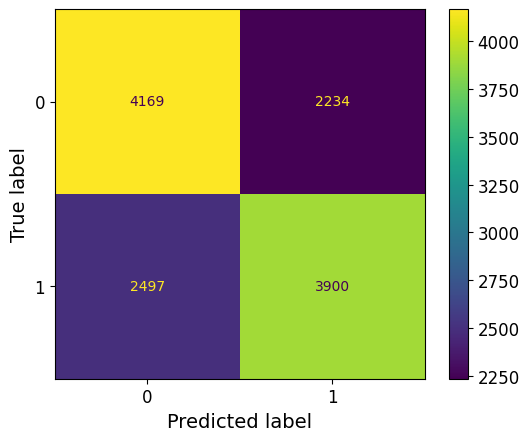

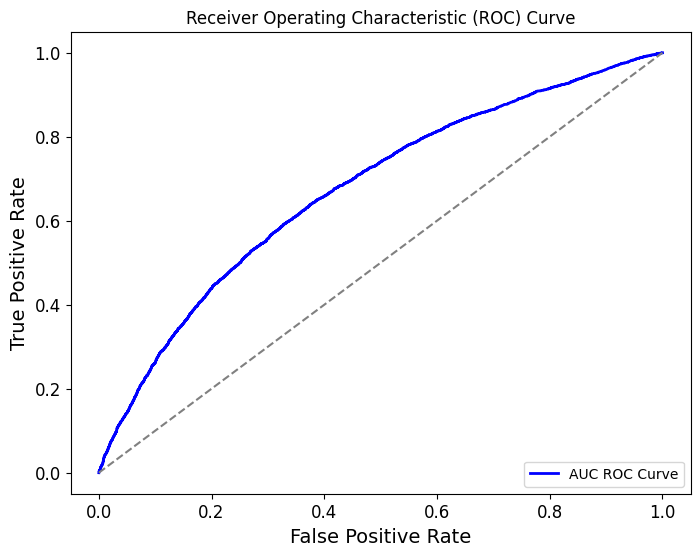

In [52]:
# Initializing the Random Forest Classifier with the best hyperparameters from Bayesian Optimization
best_rndm_forest_classfier = RandomForestClassifier(random_state = 42,
                                                    n_estimators=int(best_params['n_estimators']),
                                                    max_features=best_params['max_features'],
                                                    max_depth=int(best_params['max_depth']),
                                                    max_leaf_nodes=int(best_params['max_leaf_nodes']),
                                                    criterion=['gini', 'entropy', 'log_loss'][round(best_params['criterion_idx'])]
                                                    )

# Training the model on the training data
best_rndm_forest_classfier.fit(X_train, y_train)

# Making predictions on the test data
predictions = best_rndm_forest_classfier.predict(X_test)
proba = best_rndm_forest_classfier.predict_proba(X_test)[:, 1]
calculate_scores(y_test, predictions, proba)

export_prediction_to_csv(best_rndm_forest_classfier, 'bayesian_rndm_forest_classifier_predictions')

In [53]:
# Generating classification report
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6403
           1       0.64      0.61      0.62      6397

    accuracy                           0.63     12800
   macro avg       0.63      0.63      0.63     12800
weighted avg       0.63      0.63      0.63     12800



In [54]:
# Feature importance of Random Forest Classifier
get_feature_importance(best_rndm_forest_classfier.feature_importances_)

Product2: 0.01009981454628752
Product4: 0.008980962711789563
Product3: 0.008728355385689229
Product5: 0.008425170690238468
Transaction2: 0.0019018852893628406
Transaction3: 0.0018251027486206424
Transaction5: 0.001442970583678349
ExternalAccount7: 0.0014412441507553407
ExternalAccount6: 0.0013678107717148252
Transaction6: 0.0012818258249219752
Transaction7: 0.001190883830134155
Transaction9: 0.0011731379408063283
ActivityIndicator: 0.0011298523643781156
ExternalAccount4: 0.0011246679242814586
ExternalAccount2: 0.0010802650538459986
Transaction8: 0.0010513988067067277
ExternalAccount1: 0.001036780554666239
CompetitiveRate1: 0.0010026370670620582
ExternalAccount3: 0.0009974838177841503
RegularInteractionIndicator: 0.0009842257321681556
ExternalAccount5: 0.0009208621887383269
CompetitiveRate5: 0.0008253515174641882
Transaction4: 0.0007957065344032771
CompetitiveRate2: 0.0007516435113697915
CompetitiveRate7: 0.000545361198840933
PreviousCampaignResult: 0.0004810787248531535
Balance: 0.0002

# ADA Boost Classifier


## Grid search on ADA boost classifier

{'algorithm': 'SAMME.R', 'learning_rate': 0.9, 'n_estimators': 35}
AdaBoostClassifier(learning_rate=0.9, n_estimators=35, random_state=42)
ROC AUC Score: 0.6640505731556435
Precision: 0.6310760978880322
Recall: 0.5885571361575739
F1 Score: 0.6090754671196312
Confusion Matrix:
 [[4202 2201]
 [2632 3765]]


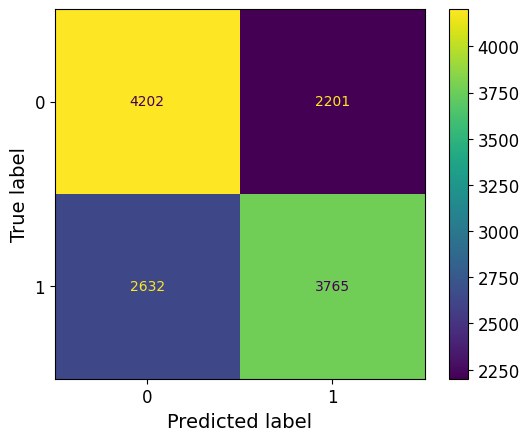

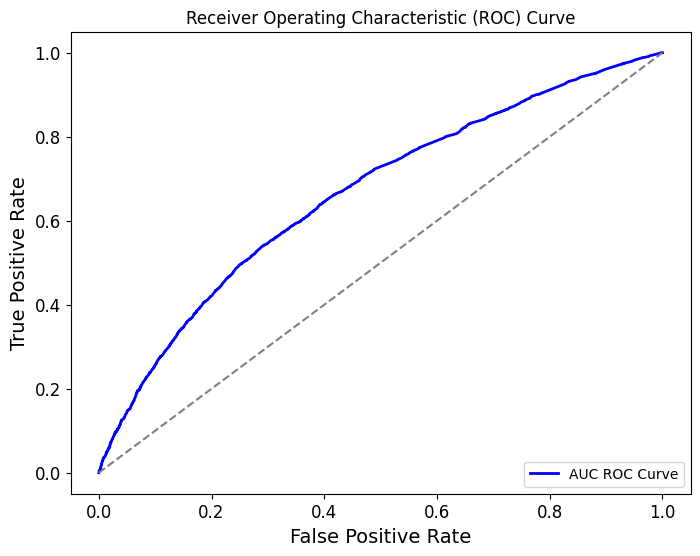

In [55]:
# Building the ADA Boost Classifier using GridSearchCV for hyperparameter tuning
n_estimators = [5, 10, 15, 20, 25, 30, 35]
learning_rate = [0.05, 0.01, 0.0001, 0.0003, 0.0005, 0.03, 0.04, 0.9]
algorithm = ['SAMME', 'SAMME.R']

# Initializing ADA Boost Classifier
Ada_Classifer = AdaBoostClassifier(random_state = 42)
# Creating a parameter grid for ADA Boost Classifier
parameter_Ada_Classifer = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate, 'algorithm' : algorithm}

# Using GridSearchCV to tune the model
grid_search_AdaClassifier = GridSearchCV(Ada_Classifer, parameter_Ada_Classifer, cv = 4, scoring='roc_auc', refit = True, n_jobs = -1)
# Fitting the GridSearchCV instance to the training data
grid_search_AdaClassifier.fit(X_train ,y_train)

# Getting the best hyperparameters and the best model from GridSearchCV
AdaClassifier_best_params_ = grid_search_AdaClassifier.best_params_
AdaClassifier_best_estimators_ = grid_search_AdaClassifier.best_estimator_
print(AdaClassifier_best_params_)
print(AdaClassifier_best_estimators_)

predictions = AdaClassifier_best_estimators_.predict(X_test)
proba = AdaClassifier_best_estimators_.predict_proba(X_test)[:, 1]
calculate_scores(y_test, predictions, proba)

export_prediction_to_csv(AdaClassifier_best_estimators_, 'grid_search_ada_classifier_predictions')

In [56]:
# Generating Classification Results
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.61      0.66      0.63      6403
           1       0.63      0.59      0.61      6397

    accuracy                           0.62     12800
   macro avg       0.62      0.62      0.62     12800
weighted avg       0.62      0.62      0.62     12800



## Random Grid Search ADA Boost Classifier

Best Hyperparameters: {'n_estimators': 35, 'learning_rate': 0.9, 'algorithm': 'SAMME'}
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9, n_estimators=35,
                   random_state=42)
Accuracy on Test Set (using best model): 0.61859375
ROC AUC Score: 0.654764072091715
Precision: 0.6238352133398725
Recall: 0.5965296232609035
F1 Score: 0.6098769378296308
Confusion Matrix:
 [[4102 2301]
 [2581 3816]]


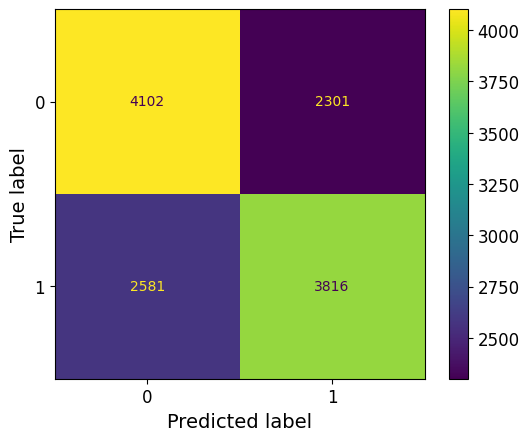

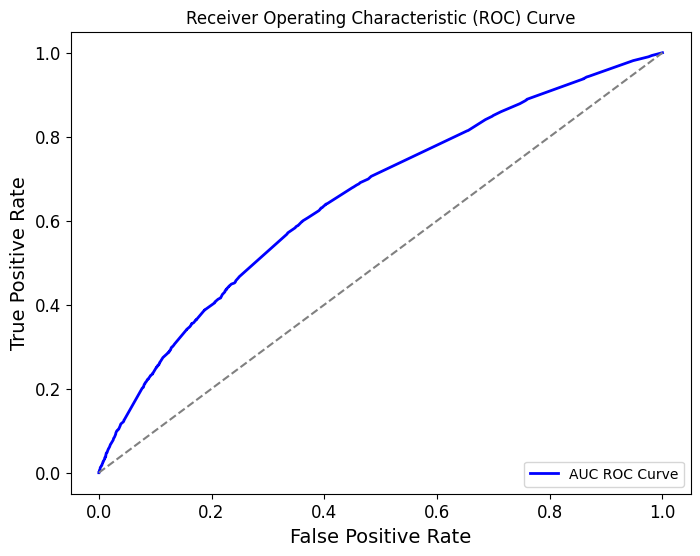

In [57]:
rndm_grid_search_ADAClassifier = RandomizedSearchCV(estimator=Ada_Classifer, param_distributions=parameter_Ada_Classifer,
                                   scoring='roc_auc', cv=4, n_jobs = -1, random_state=42, refit=True, n_iter=20)
# Fitting the RandomSearchCV instance to the data
rndm_grid_search_ADAClassifier.fit(X_train, y_train)

# Getting the best hyperparameters found by RandomSearchCV
best_params = rndm_grid_search_ADAClassifier.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model_rndm_grid_ADA = rndm_grid_search_ADAClassifier.best_estimator_
print(best_model_rndm_grid_ADA)

# Evaluating the best model on the test set
best_model_score = best_model_rndm_grid_ADA.score(X_test, y_test)
print("Accuracy on Test Set (using best model):", best_model_score)


predictions = best_model_rndm_grid_ADA.predict(X_test)
proba = best_model_rndm_grid_ADA.predict_proba(X_test)[:, 1]
calculate_scores(y_test, predictions, proba)

export_prediction_to_csv(best_model_rndm_grid_ADA, 'random_search_ada_classifier_predictions')

In [58]:
# Generating classification Results
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      6403
           1       0.62      0.60      0.61      6397

    accuracy                           0.62     12800
   macro avg       0.62      0.62      0.62     12800
weighted avg       0.62      0.62      0.62     12800



## Bayesian optimization on ADA Boost Classifier


In [59]:
# Define the function for hyperparameter tuning
def optimize_ada(n_estimators, learning_rate, algorithm_idx):
  # Mapping index to algorithm values
  algorithm_values = ['SAMME', 'SAMME.R']

  # Rounding the index to get the algorithm value
  algorithm_idx = round(algorithm_idx)

  # Initializing the ADA Boost Classifier with specified hyperparameters
  model = AdaBoostClassifier(n_estimators=int(n_estimators), random_state = 42, learning_rate=learning_rate, algorithm=algorithm_values[algorithm_idx])

  # Training the model on the training data
  model.fit(X_train, y_train)

  # Making predictions on the test data and calculating ROC AUC score
  proba = model.predict_proba(X_test)[:, 1]
  return roc_auc_score(y_test, proba)

In [60]:
# Defining the search space for hyperparameters
n_estimators = (5,100)
learning_rate = (1e-6, 10)
algorithm = (0,1)

parameter_ada = {
    'n_estimators' : n_estimators,
    'learning_rate' : learning_rate,
    'algorithm_idx' : algorithm
    }

# Initializing BayesianOptimization for precision tuning
bayes_optimizer = BayesianOptimization(
    f=optimize_ada,
    pbounds=parameter_ada,
    random_state=42
)

# Performing Bayesian Optimization
bayes_optimizer.maximize(init_points=10, n_iter=30)

# Getting the best hyperparameters and maximum precision found
best_params = bayes_optimizer.max['params']
best_precision = bayes_optimizer.max['target']

print(f"Best Hyperparameters for Precision: {best_params}")
print(f"Best Precision: {best_precision}")
print(f"best combination of parameters and target value: {bayes_optimizer.max}")

|   iter    |  target   | algori... | learni... | n_esti... |
-------------------------------------------------------------
| 1         | 0.6001    | 0.3745    | 9.507     | 74.54     |
| 2         | 0.6578    | 0.5987    | 1.56      | 19.82     |
| 3         | 0.6001    | 0.05808   | 8.662     | 62.11     |
| 4         | 0.6648    | 0.7081    | 0.2058    | 97.14     |
| 5         | 0.4001    | 0.8324    | 2.123     | 22.27     |
| 6         | 0.6002    | 0.1834    | 3.042     | 54.85     |
| 7         | 0.6002    | 0.4319    | 2.912     | 63.13     |
| 8         | 0.6002    | 0.1395    | 2.921     | 39.8      |
| 9         | 0.6001    | 0.4561    | 7.852     | 23.97     |
| 10        | 0.6001    | 0.5142    | 5.924     | 9.413     |
| 11        | 0.6649    | 0.7824    | 0.2305    | 97.09     |
| 12        | 0.6544    | 0.0946    | 1.09      | 18.61     |
| 13        | 0.4001    | 1.0       | 2.629     | 18.47     |
| 14        | 0.6574    | 0.05893   | 0.6326    | 19.62     |
| 15    

ROC AUC Score: 0.6652506832826208
Precision: 0.6381455599113687
Recall: 0.5852743473503205
F1 Score: 0.6105675146771037
Confusion Matrix:
 [[4280 2123]
 [2653 3744]]


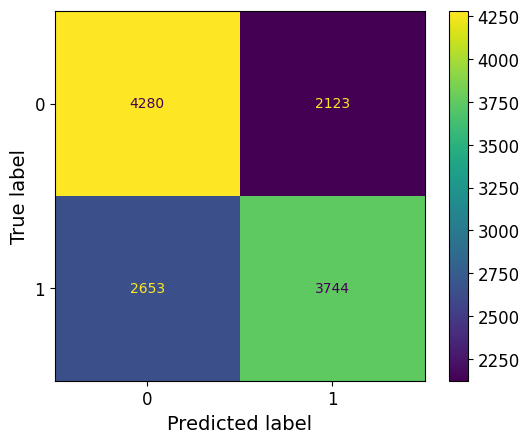

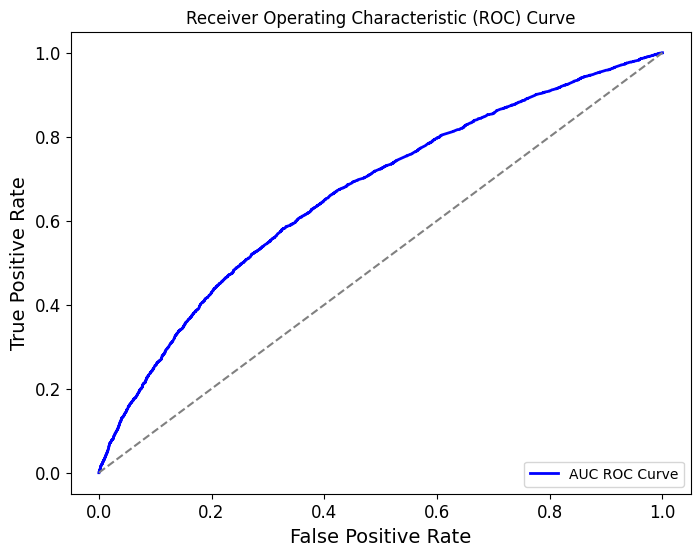

In [61]:
# Initializing the ADA Boost Classifier with the best hyperparameters from Bayesian Optimization
best_ada_classfier = AdaBoostClassifier(random_state = 42, n_estimators=int(best_params['n_estimators']), learning_rate=best_params['learning_rate'],
                                                    algorithm=['SAMME', 'SAMME.R'][round(best_params['algorithm_idx'])])

# Training the model on the training data
best_ada_classfier.fit(X_train, y_train)

# Making predictions on the test data
predictions = best_ada_classfier.predict(X_test)
proba = best_ada_classfier.predict_proba(X_test)[:, 1]

# Calculating and displaying various classification scores and metrics
calculate_scores(y_test, predictions, proba)

In [62]:
# Generating Classification Report
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      6403
           1       0.64      0.59      0.61      6397

    accuracy                           0.63     12800
   macro avg       0.63      0.63      0.63     12800
weighted avg       0.63      0.63      0.63     12800



In [63]:
# Getting feature importance of ADA Boost Classifier
get_feature_importance(best_ada_classfier.feature_importances_)

Product3: 0.020618556701030927
PreviousCampaignResult: 0.010309278350515464
Product2: 0.010309278350515464
Product5: 0.010309278350515464
Transaction3: 0.010309278350515464
ExternalAccount1: 0.010309278350515464
ExternalAccount7: 0.010309278350515464
CompetitiveRate2: 0.010309278350515464
Balance: 0.0
Product1: 0.0
Product4: 0.0
Product6: 0.0
Transaction1: 0.0
Transaction2: 0.0
Transaction4: 0.0
Transaction5: 0.0
Transaction6: 0.0
Transaction7: 0.0
Transaction8: 0.0
Transaction9: 0.0
ExternalAccount2: 0.0
ExternalAccount3: 0.0
ExternalAccount4: 0.0
ExternalAccount5: 0.0
ExternalAccount6: 0.0
ActivityIndicator: 0.0
RegularInteractionIndicator: 0.0
CompetitiveRate1: 0.0
CompetitiveRate5: 0.0
CompetitiveRate7: 0.0


# Gradient Boosting Classifier

## Grid search on Gradient Boosting Classifier

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 4, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_samples_split': 0.3, 'n_estimators': 7}
GradientBoostingClassifier(max_features=4, max_leaf_nodes=3, min_samples_leaf=3,
                           min_samples_split=0.3, n_estimators=7,
                           random_state=42)
ROC AUC Score: 0.6342220509765247
Precision: 0.6324065196548418
Recall: 0.5155541660153197
F1 Score: 0.5680330692387187
Confusion Matrix:
 [[4486 1917]
 [3099 3298]]


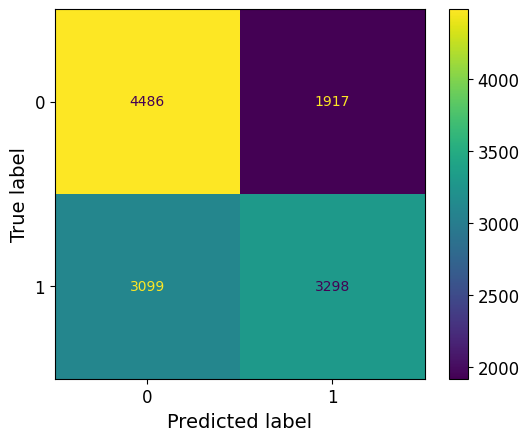

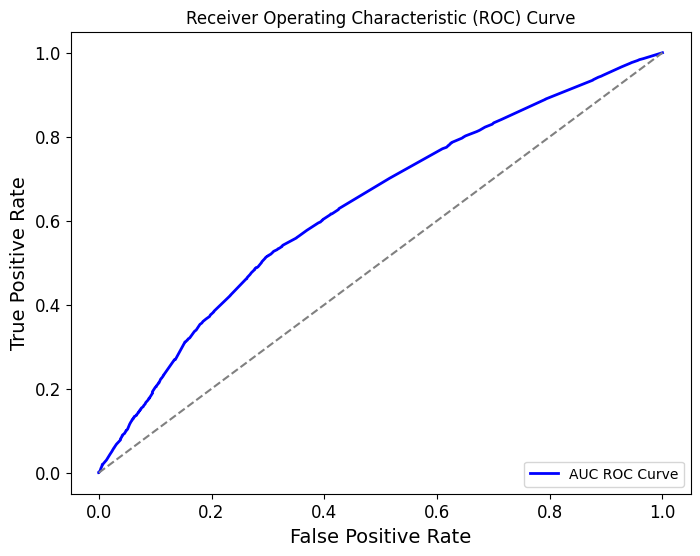

In [64]:
# Gradient Boosting Classifier using GridSearchCV for hyperparameter tuning
GB_Classifier = GradientBoostingClassifier(random_state = 42)

# Define the search space for hyperparameters
n_estimators = [3, 7]
learning_rate = [0.1, 0.01, .001]
max_depth = [3, 15, 20]
min_samples_split = [0.2, 0.3]
min_samples_leaf = [3, 4]
max_features = [4, 6]
max_leaf_nodes = [2, 3]

parameter_GB_Classifier = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate,
                              'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                              'min_samples_leaf' : min_samples_leaf, 'max_features' : max_features,
                              'max_leaf_nodes' : max_leaf_nodes}

# Using GridSearchCV to tune the model
grid_search_GB_Classifier = GridSearchCV(GB_Classifier, parameter_GB_Classifier, cv = 4, scoring='roc_auc',
                               refit = True, n_jobs = -1)

# Fitting the GridSearchCV instance to the training data
grid_search_GB_Classifier.fit(X_train,y_train)

# Getting the best hyperparameters and the best model from GridSearchCV
GB_Classifier_best_params_ = grid_search_GB_Classifier.best_params_

GB_Classifier_best_estimators_ = grid_search_GB_Classifier.best_estimator_

print(GB_Classifier_best_params_)

print(GB_Classifier_best_estimators_)

# Making predictions and calculate various classification scores and metrics
predictions = GB_Classifier_best_estimators_.predict(X_test)
proba = GB_Classifier_best_estimators_.predict_proba(X_test)[:, 1]
calculate_scores(y_test, predictions, proba)

export_prediction_to_csv(GB_Classifier_best_estimators_, 'grid_search_gb_classifier_predictions')

In [65]:
# Generating Classification Report
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.59      0.70      0.64      6403
           1       0.63      0.52      0.57      6397

    accuracy                           0.61     12800
   macro avg       0.61      0.61      0.60     12800
weighted avg       0.61      0.61      0.60     12800



## Random Search on Gradient Boosting Classfier

Best Hyperparameters: {'n_estimators': 30, 'min_samples_split': 0.3, 'min_samples_leaf': 4, 'max_leaf_nodes': 10, 'max_features': 10, 'max_depth': 15, 'learning_rate': 0.1}
GradientBoostingClassifier(max_depth=15, max_features=10, max_leaf_nodes=10,
                           min_samples_leaf=4, min_samples_split=0.3,
                           n_estimators=30, random_state=42)
Accuracy on Test Set (using best model): 0.625390625
ROC AUC Score: 0.6688332402221475
Precision: 0.6293604651162791
Recall: 0.6091918086603095
F1 Score: 0.6191119231074748
Confusion Matrix:
 [[4108 2295]
 [2500 3897]]


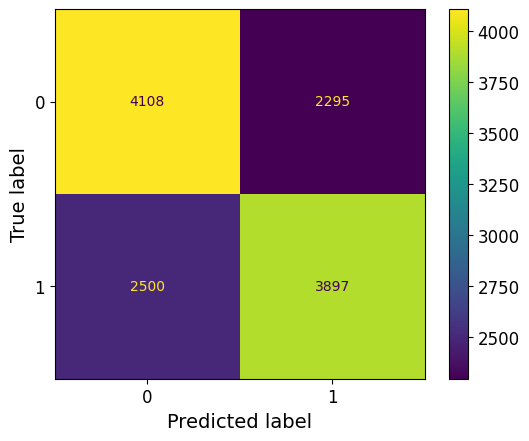

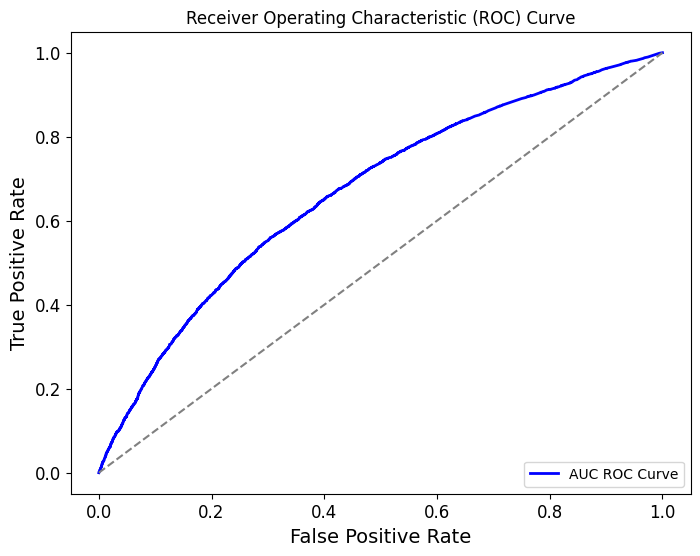

In [66]:
# Gradient Boosting Classifier using RandomizedSearchCV for hyperparameter tuning
n_estimators = [3, 7, 10, 15, 25, 30]
learning_rate = [0.1, 0.01, .001, 0.9, 0.05]
max_depth = [3, 15, 20, 25]
min_samples_split = [0.2, 0.3, 0.6]
min_samples_leaf = [3, 4, 7, 10]
max_features = [4, 6, 10]
max_leaf_nodes = [2, 3, 7, 10]

parameter_GB_Classifier = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate,
                              'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                              'min_samples_leaf' : min_samples_leaf, 'max_features' : max_features,
                              'max_leaf_nodes' : max_leaf_nodes}


# Initializing RandomizedSearchCV
rndm_search_GBClassifier = RandomizedSearchCV(estimator=GB_Classifier, param_distributions=parameter_GB_Classifier,
                                   scoring='roc_auc', cv=4, n_jobs = -1, random_state=42, refit=True, n_iter=20)
# Fitting the RandomSearchCV instance to the data
rndm_search_GBClassifier.fit(X_train, y_train)

# Getting the best hyperparameters found by RandomSearchCV
best_params = rndm_search_GBClassifier.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model_rndm_search_GB = rndm_search_GBClassifier.best_estimator_
print(best_model_rndm_search_GB)


# Evaluating the best model on the test set
best_model_score = best_model_rndm_search_GB.score(X_test, y_test)
print("Accuracy on Test Set (using best model):", best_model_score)

# Make predictions and calculate various classification scores and metrics
predictions = best_model_rndm_search_GB.predict(X_test)
proba = best_model_rndm_search_GB.predict_proba(X_test)[:, 1]
calculate_scores(y_test, predictions, proba)


In [67]:
# Generating Classification Report
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      6403
           1       0.63      0.61      0.62      6397

    accuracy                           0.63     12800
   macro avg       0.63      0.63      0.63     12800
weighted avg       0.63      0.63      0.63     12800



## Bayesian optimization on Gradient Boosting Classifier


In [68]:
# Defining the function for hyperparameter tuning
def optimize_gb_classifier(n_estimators, learning_rate, max_depth, max_features, max_leaf_nodes, min_samples_split, min_samples_leaf):
  # Creating a dictionary of hyperparameters
  params = {
      'n_estimators': int(n_estimators),
      'learning_rate': learning_rate,
      'max_depth': int(max_depth),
      'max_features': int(max_features),
      'max_leaf_nodes': int(max_leaf_nodes),
      'min_sample_split': min_samples_split,
      'min_sample_leaf': int(min_samples_leaf)
  }

  # Initializing the Gradient Boosting Classifier with hyperparameters
  model = GradientBoostingClassifier(n_estimators=int(n_estimators),learning_rate=learning_rate, max_depth=int(max_depth),max_features=int(max_features),
                                   max_leaf_nodes=int(max_leaf_nodes), random_state = 42, min_samples_split=min_samples_split, min_samples_leaf=int(min_samples_leaf))
  # Train the model on the training data
  model.fit(X_train, y_train)
  proba = model.predict_proba(X_test)[:, 1]
  return roc_auc_score(y_test, proba)

In [69]:
# Defining the search space for hyperparameters
n_estimators = (3, 200)
learning_rate = (1e-6, 0.01)
max_depth = (3, 20)
max_features = (2, 10)
max_leaf_nodes = (2, 20)
min_samples_split = (0.2, 0.9)
min_samples_leaf = (3, 20)

parameter_GB_Classifier = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate,
                           'max_depth' : max_depth, 'max_features' : max_features,
                           'max_leaf_nodes' : max_leaf_nodes,
                           'min_samples_split': min_samples_split,
                           'min_samples_leaf': min_samples_leaf
                           }

# Initializing BayesianOptimization for precision tuning
bayes_optimizer = BayesianOptimization(
    f=optimize_gb_classifier,
    pbounds=parameter_GB_Classifier,
    random_state=42
)

# Performing Bayesian Optimization
bayes_optimizer.maximize(init_points=10, n_iter=30)

# Getting the best hyperparameters and maximum precision found
best_params = bayes_optimizer.max['params']
best_precision = bayes_optimizer.max['target']

print(f"Best Hyperparameters for Precision: {best_params}")
print(f"Best Precision: {best_precision}")
print(f"best combination of parameters and target value: {bayes_optimizer.max}")

|   iter    |  target   | learni... | max_depth | max_fe... | max_le... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.6543    | 0.003746  | 19.16     | 7.856     | 12.78     | 5.652     | 0.3092    | 14.44     |
| 2         | 0.6459    | 0.008662  | 13.22     | 7.665     | 2.371     | 19.49     | 0.7827    | 44.83     |
| 3         | 0.6533    | 0.001819  | 6.118     | 4.434     | 11.45     | 10.34     | 0.4039    | 123.5     |
| 4         | 0.6541    | 0.001396  | 7.966     | 4.931     | 10.21     | 16.35     | 0.3398    | 104.3     |
| 5         | 0.6521    | 0.005925  | 3.79      | 6.86      | 5.069     | 4.106     | 0.8642    | 193.2     |
| 6         | 0.6535    | 0.008084  | 8.178     | 2.781     | 14.32     | 10.48     | 0.2854    | 100.5     |
| 7         | 0.6502    | 0.0003449 | 18.46     | 4.07      | 13.93     | 8.299     | 0.564     | 110.7     |
| 8       

GradientBoostingClassifier(learning_rate=0.01, max_depth=20, max_features=10,
                           max_leaf_nodes=19, min_samples_leaf=9,
                           min_samples_split=0.2, n_estimators=179,
                           random_state=42)
ROC AUC Score: 0.669004028833893
Precision: 0.626347866854196
Recall: 0.6265436923557918
F1 Score: 0.6264457643013442
Confusion Matrix:
 [[4012 2391]
 [2389 4008]]


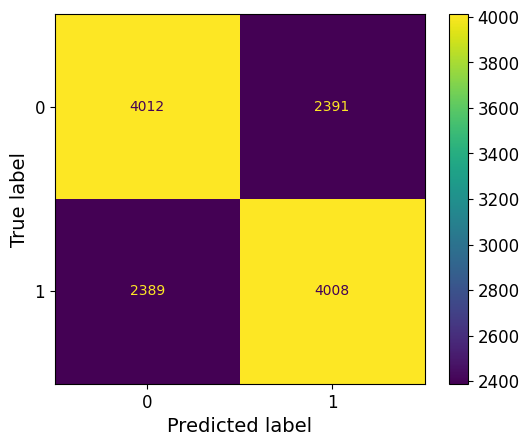

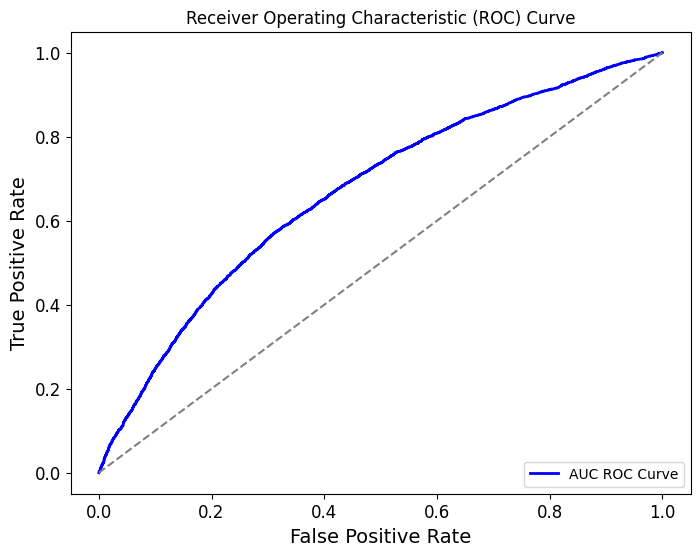

In [70]:
# Best Hyperparameters for Precision: {'learning_rate': 0.01, 'max_depth': 12.561635495199127, 'max_features': 7.003757232704405, 'max_leaf_nodes': 17.718709291222304, 'min_samples_leaf': 17.38179448694716, 'min_samples_split': 0.2, 'n_estimators': 196.2748826997553}
# Best Precision: 0.6287492592466636
# best combination of parameters and target value: {'target': 0.6287492592466636, 'params': {'learning_rate': 0.01, 'max_depth': 12.561635495199127, 'max_features': 7.003757232704405, 'max_leaf_nodes': 17.718709291222304, 'min_samples_leaf': 17.38179448694716, 'min_samples_split': 0.2, 'n_estimators': 196.2748826997553}}
best_params={'learning_rate': 0.01, 'max_depth': 20.0, 'max_features': 10.0, 'max_leaf_nodes': 19.424411560830002, 'min_samples_leaf': 9.160903855025945, 'min_samples_split': 0.2, 'n_estimators': 179.8350665429981}

# Grading boosting classifier with the best params
best_gb_classfier = GradientBoostingClassifier(random_state = 42, n_estimators=int(best_params['n_estimators']), learning_rate=best_params['learning_rate'],
                                    max_depth=int(best_params['max_depth']), max_features=int(best_params['max_features']),
                                    max_leaf_nodes=int(best_params['max_leaf_nodes']), min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=int(best_params['min_samples_leaf']))
print(best_gb_classfier)

# Fitting the model
best_gb_classfier.fit(X_train, y_train)
predictions= best_gb_classfier.predict(X_test)
proba = best_gb_classfier.predict_proba(X_test)[:, 1]

# Generating scores
calculate_scores(y_test, predictions, proba)
export_prediction_to_csv(best_gb_classfier, 'bayesian_gb_classifier_predictions')

In [71]:
# Generating classification report
calculate_classification_report(y_test, predictions)

----------------------Classification Report-----------------------
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      6403
           1       0.63      0.63      0.63      6397

    accuracy                           0.63     12800
   macro avg       0.63      0.63      0.63     12800
weighted avg       0.63      0.63      0.63     12800



In [72]:
# Getting feature importance from the best model
get_feature_importance(best_gb_classfier.feature_importances_)

Product5: 0.022133426149159842
Product4: 0.016527621162856568
Product3: 0.012654483185528708
Product2: 0.010521669810665893
Transaction2: 0.0008783913638619504
ActivityIndicator: 0.0008511898800664409
Transaction4: 0.0008454189697748448
Transaction6: 0.0006529747095177078
ExternalAccount7: 0.0006174671304433724
CompetitiveRate2: 0.0005987194858246325
Transaction5: 0.0005947045663325527
CompetitiveRate5: 0.000502293907318374
Transaction3: 0.0003692960990509251
Transaction7: 0.0003341006614001119
ExternalAccount3: 0.0002999952019280213
Balance: 0.0001345289228658749
ExternalAccount4: 0.00011037614475780576
RegularInteractionIndicator: 0.0001047866925488051
Transaction9: 3.737132553507101e-05
ExternalAccount6: 3.604210599858066e-05
CompetitiveRate7: 3.254312445911685e-05
ExternalAccount1: 2.837045980757405e-05
ExternalAccount5: 2.7133652135980243e-05
CompetitiveRate1: 1.2946341987004602e-05
Product6: 9.738462457349435e-06
Transaction8: 7.03359920082136e-06
ExternalAccount2: 6.728671397005

In [73]:
bayes_optimizer.max['params']

{'learning_rate': 0.01,
 'max_depth': 8.057124876442504,
 'max_features': 10.0,
 'max_leaf_nodes': 12.469253536925669,
 'min_samples_leaf': 11.593594448697077,
 'min_samples_split': 0.2,
 'n_estimators': 198.30147642657312}

## Implementing Neural Network Classification using TensorFlow

In [74]:
class NeuralNetworkClassifier:
    # Initializeing the neural network classifier with the specified input dimension.
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.model = self.build_model()  # Building the neural network model.

    def build_model(self):
        # Building a sequential neural network model with multiple layers.
        model = Sequential()
        # Input Layer
        model.add(Dense(X_train.shape[1], activation='relu', input_dim = self.input_dim))

        # Hidden Layers
        model.add(Dropout(0.5))
        model.add(Dense(256, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dropout(0.3))
        model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dropout(0.3))

        # Output layer
        model.add(Dense(1, kernel_initializer='normal', activation='relu'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    def train(self, X_train, y_train, epochs=50, batch_size=32, early_stop=True):
        # Train the neural network model on the given training data.
        callbacks = []
        if early_stop:
            early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
            callbacks.append(early_stopping)

        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                callbacks=callbacks, verbose=1)
        return history

    def evaluate(self, X_test, y_test):
        # Evaluate the trained model on the test data and return metrics.
        y_pred = self.model.predict(X_test)
        y_pred_binary = np.round(y_pred)

        accuracy = accuracy_score(y_test, y_pred_binary)
        confusion_mat = confusion_matrix(y_test, y_pred_binary)
        classification_rep = classification_report(y_test, y_pred_binary)
        auc_roc = roc_auc_score(y_test, y_pred)

        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        return accuracy, confusion_mat, classification_rep, auc_roc, fpr, tpr, roc_auc

    def plot_roc_curve(self, fpr, tpr, roc_auc):
        # Plot the ROC curve based on the true positive rate and false positive rate.
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

In [75]:
# Create and train the neural network model
input_dim = X_train.shape[1]
ann_classifier = NeuralNetworkClassifier(input_dim)
history = ann_classifier.train(X_train,y_train)

Epoch 1/50
1600/1600 [==============================] - 6s 3ms/step - loss: 0.8721 - accuracy: 0.5395
Epoch 2/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.7092 - accuracy: 0.5465
Epoch 3/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.7042 - accuracy: 0.5628
Epoch 4/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6897 - accuracy: 0.5931
Epoch 5/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6836 - accuracy: 0.5992
Epoch 6/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6791 - accuracy: 0.6031
Epoch 7/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6779 - accuracy: 0.6084
Epoch 8/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6746 - accuracy: 0.6141
Epoch 9/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6747 - accuracy: 0.6136
Epoch 10/50
1600/1600 [==============================] - 5s 3ms/step - loss: 0.673

400/400 [==============================] - 1s 1ms/step
Accuracy: 0.626640625
Confusion Matrix:
[[4714 1689]
 [3090 3307]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      6403
           1       0.66      0.52      0.58      6397

    accuracy                           0.63     12800
   macro avg       0.63      0.63      0.62     12800
weighted avg       0.63      0.63      0.62     12800

AUC-ROC Score: 0.6585726422644966


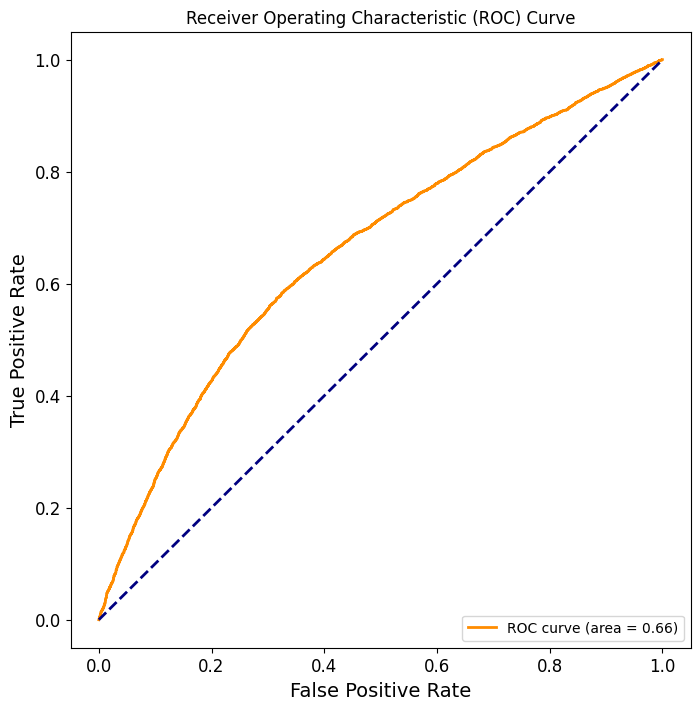

In [76]:
# Evaluating the model
accuracy, confusion_mat, classification_rep, auc_roc, fpr, tpr, roc_auc = ann_classifier.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'Classification Report:\n{classification_rep}')
print(f'AUC-ROC Score: {auc_roc}')

# Plotting ROC Curve
ann_classifier.plot_roc_curve(fpr, tpr, roc_auc)